In [1]:
import pandas as pd
from datetime import timedelta
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline
from scipy.stats import ks_2samp

import missingno as msno

In [19]:
data = pd.read_csv('../User/cases/missing/train.csv')

In [14]:
data.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,1164,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959
700,701,20,RL,85.0,14331,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,312500
1103,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,159500
1302,1303,60,RL,92.0,10120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,290000


In [20]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## Map and chi2

C:\ProgramData\Anaconda3\lib\site-packages\missingno\missingno.py:198: UserWarning: The 'inline' argument has been deprecated, and will be removed in a future version of missingno.
  "The 'inline' argument has been deprecated, and will be removed in a future version "


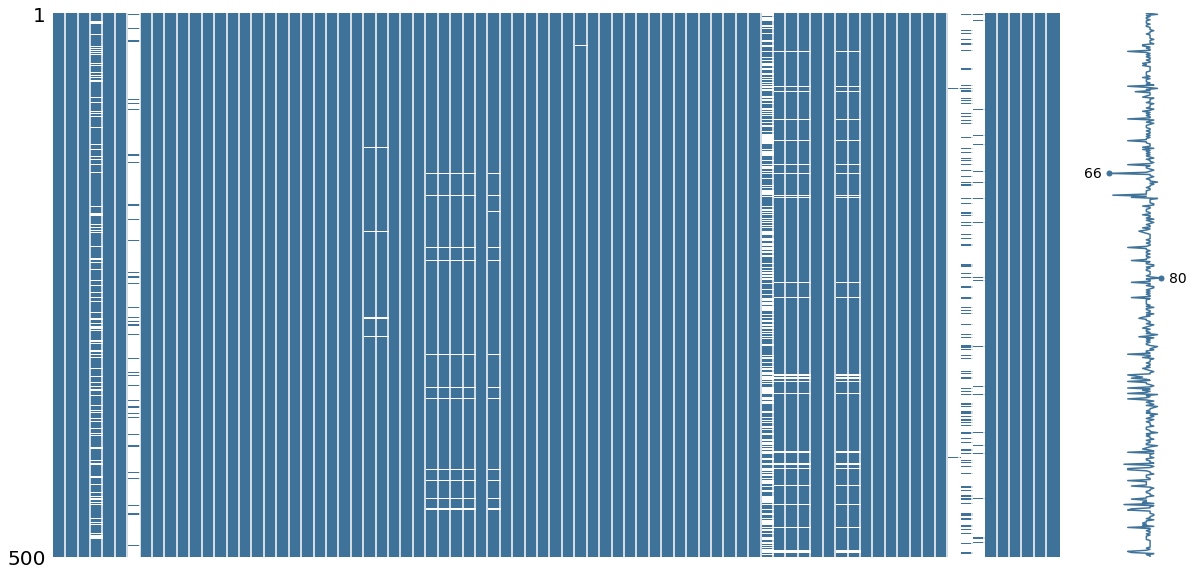

In [5]:
msno.matrix(data.sample(500), inline=True, sparkline=True, figsize=(20,10), sort=None, color=(0.25, 0.45, 0.6))

C:\ProgramData\Anaconda3\lib\site-packages\missingno\missingno.py:460: UserWarning: The 'inline' argument has been deprecated, and will be removed in a future version of missingno.
  "The 'inline' argument has been deprecated, and will be removed in a future version "


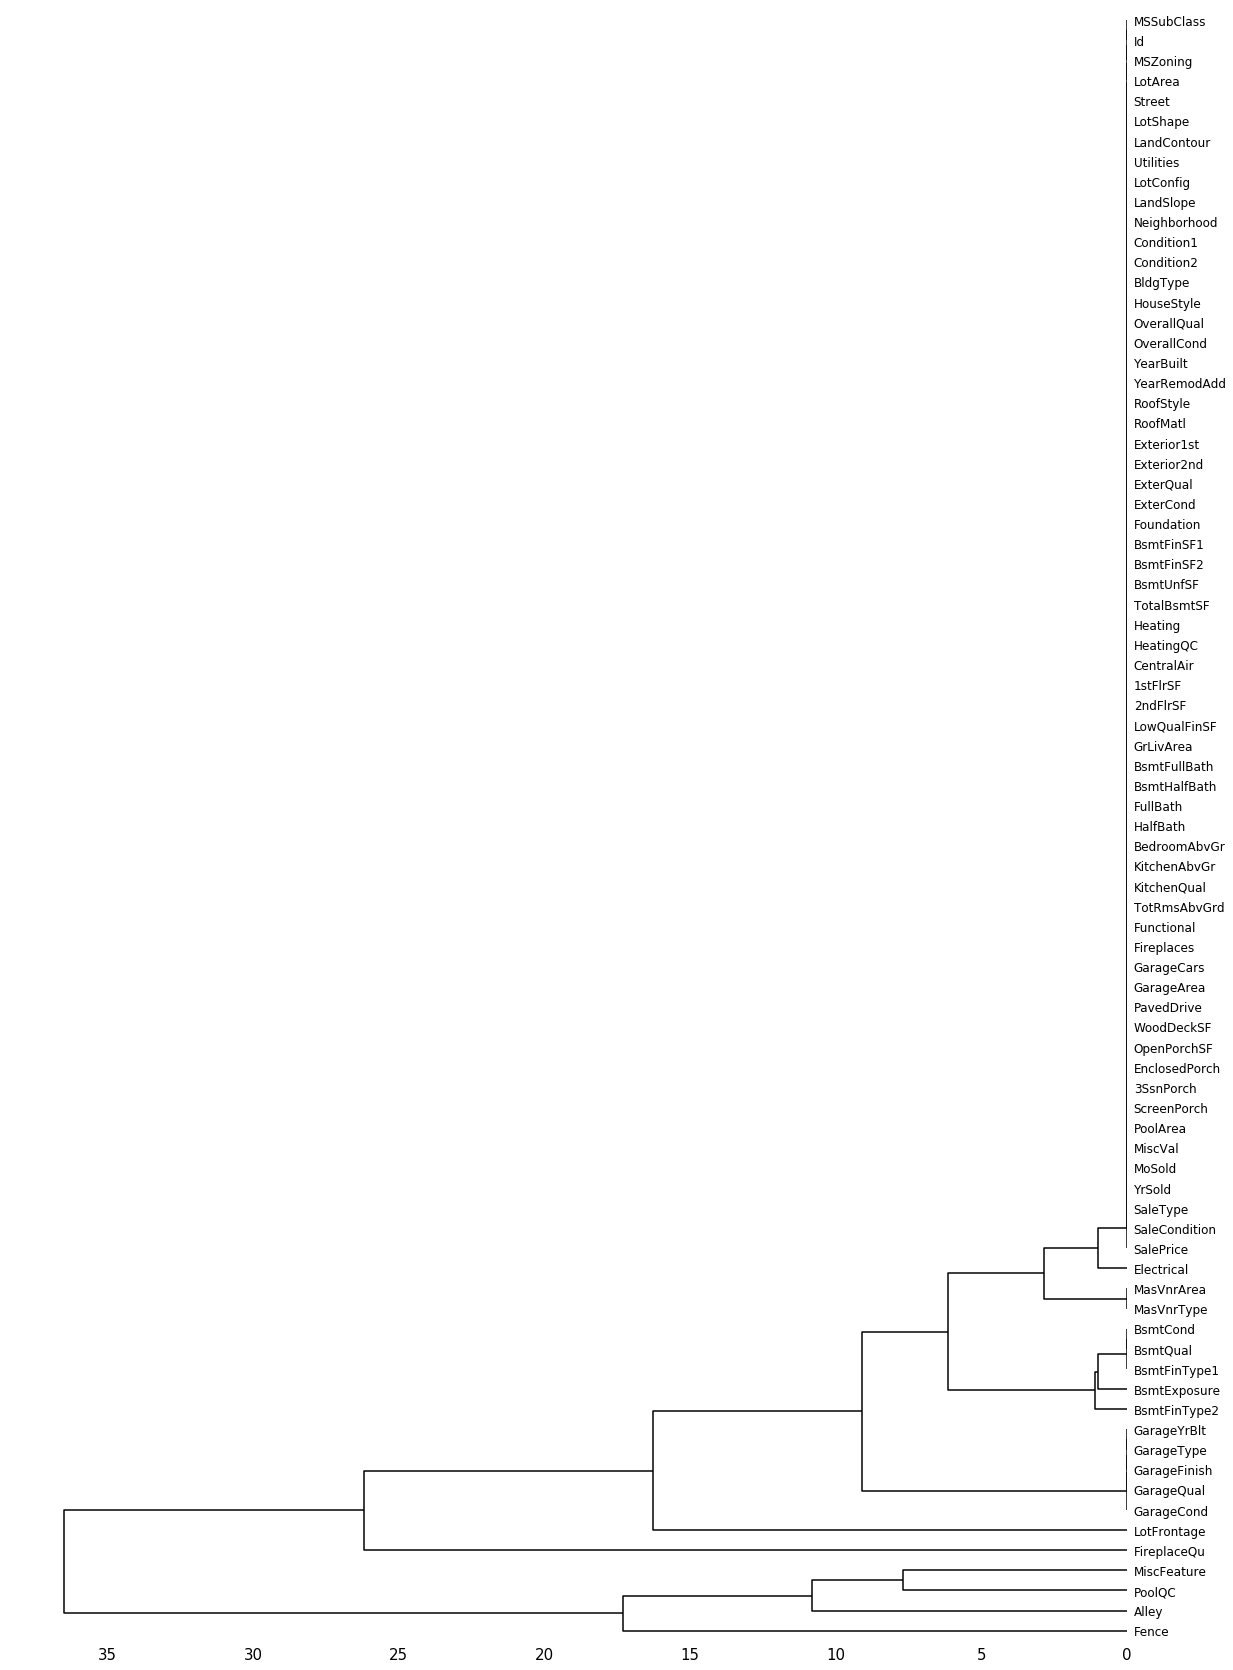

In [6]:
msno.dendrogram(data, inline=True, fontsize=12, figsize=(20,30))

In [ ]:
from scipy.stats import chi2_contingency

props = pd.crosstab(train.incomplete, train.TARGET)
c = chi2_contingency(props, lambda_="log-likelihood")
print(props, "\n p-value= ", c[1])

#### go back to data:

In [7]:
# all missing in the data
total_cells = np.product(data.shape)
total_missing = total.sum()

(total_missing/total_cells) * 100

5.889565364451209

In [21]:
# drop column
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [23]:
# drop row
data.dropna(subset = ['MasVnrArea', 'MasVnrType', 'Electrical'], inplace=True)

In [24]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FireplaceQu,685,0.472088
LotFrontage,257,0.177119
GarageType,81,0.055824
GarageYrBlt,81,0.055824
GarageFinish,81,0.055824
GarageCond,81,0.055824
GarageQual,81,0.055824
BsmtExposure,38,0.026189
BsmtFinType2,38,0.026189
BsmtFinType1,37,0.025500


In [32]:
na_col = data.columns[data.isna().any()]

In [51]:
for i in na_col:
    na = data[data[i].isna()].SalePrice
    non_na = data[data[i].isna()==False].SalePrice
    print('\nKolmogorov-Smirnov statistic for variable %s'%i, ks_2samp(na, non_na)[1])  


Kolmogorov-Smirnov statistic for variable LotFrontage 3.457377190414498e-05

Kolmogorov-Smirnov statistic for variable BsmtQual 6.312420313818857e-14

Kolmogorov-Smirnov statistic for variable BsmtCond 6.312420313818857e-14

Kolmogorov-Smirnov statistic for variable BsmtExposure 2.3153217380658807e-13

Kolmogorov-Smirnov statistic for variable BsmtFinType1 6.312420313818857e-14

Kolmogorov-Smirnov statistic for variable BsmtFinType2 2.3153217380658807e-13

Kolmogorov-Smirnov statistic for variable FireplaceQu 6.403175955580606e-77

Kolmogorov-Smirnov statistic for variable GarageType 9.425085758417742e-26

Kolmogorov-Smirnov statistic for variable GarageYrBlt 9.425085758417742e-26

Kolmogorov-Smirnov statistic for variable GarageFinish 9.425085758417742e-26

Kolmogorov-Smirnov statistic for variable GarageQual 9.425085758417742e-26

Kolmogorov-Smirnov statistic for variable GarageCond 9.425085758417742e-26


In [53]:
data[na_col].dtypes

LotFrontage     float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [60]:
for i in na_col:
    if data[i].dtypes == 'object':
        data.loc[data[i].isna(), i] = 'NA_category'
       

In [ ]:
LotFrontage 
GarageYrBlt

## Mean, Median in combination with groupby:

In [ ]:
## Fill missing values in Age feature with each sex’s mean value of ## Age 
train['Age'].fillna(train.groupby('Sex')['Age'].transform("mean"), inplace=True) 
train['Age'].fillna(train.groupby('Sex')['Age'].transform("median"), inplace=True)

## Linear Regression:

In [100]:
not_na_col = [col for col in data.columns if (col not in na_col) or (col in ['LotFrontage', 'GarageYrBlt'])]
corr = data[not_na_col].corr()

In [103]:
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.4).any()
high_corr = corr.loc[m, m]

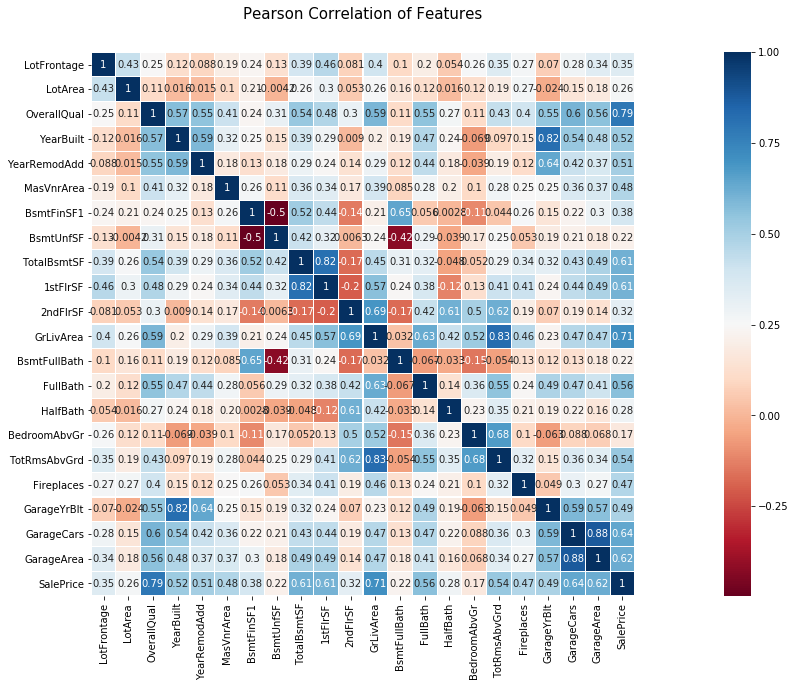

In [104]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(high_corr, linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data1 = train[['Pclass','SibSp','Parch','Fare','Age']]

#Step-1: Split the dataset that contains the missing values and no missing values are test and train 
#respectively.x_train = data[data['Age'].notnull()].drop(columns='Age')
y_train = data[data['Age'].notnull()]['Age']
x_test = data[data['Age'].isnull()].drop(columns='Age')
y_test = data[data['Age'].isnull()]['Age']

#Step-2: Train the machine learning algorithmlinreg.fit(x_train, y_train)
#Step-3: Predict the missing values in the attribute of the test data.predicted = linreg.predict(x_test)
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.train.Age[train.Age.isnull()] = predicted
train.info()

## Multiple Imputation using MICE:

In [ ]:
from fancyimpute import MICE

#fancy impute removes column names.
train_cols = list(train)

# Use MICE to fill in each row's missing featurestrain = pd.DataFrame(MICE(verbose=False).complete(train))
train.columns = train_cols

#### model : predictor function
    A model that has fit, predict, and predict_dist methods.
    Defaults to BayesianRidgeRegression(lambda_reg=0.001).
    Note that the regularization parameter lambda_reg
    is by default scaled by np.linalg.norm(np.dot(X.T,X)).
    Sensible lambda_regs to try: 0.25, 0.1, 0.01, 0.001, 0.0001.

In [ ]:
data.fillna(method='bfill',inplace=True)
#for forward-fill
data.fillna(method='ffill',inplace=True)

In [15]:
def num_analysis(i=False, feat_name=False):
    
    if (i):
        feat = num_feat[i]
    
    elif (feat_name):
        feat = feat_name
        
    print("Feature: {}  & Correlation with target: {}".format(feat,train[feat].corr(train['SalePrice'])))
            
    fig=plt.figure(figsize=(18,2))

    ax=fig.add_subplot(1,3,1)
    ax.hist(train[feat])
    ax.set_title("train", fontsize = 10)

    ax=fig.add_subplot(1,3,2)
    ax.scatter(train[feat],train['SalePrice'])
    ax.set_title("scatter", fontsize = 10)
    ax.set_xlabel(feat,fontsize=10)
    ax.set_ylabel("SalesPrice",fontsize=10)
    
    ax=fig.add_subplot(1,3,3)
    ax.hist(test[feat])
    ax.set_title("test", fontsize = 10)
    
    plt.show()

In [18]:
train = data
num_feat = [col for col in train.columns if train[col].dtype != 'object']